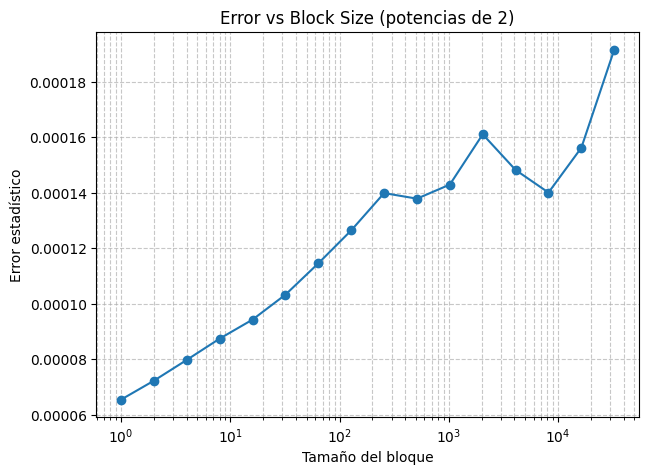

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Función de block averaging
# ==========================
def block_average(data, block_size):
    n = len(data)
    n_blocks = n // block_size
    if n_blocks < 2:
        raise ValueError("Muy pocos bloques")
    
    data = data[:block_size * n_blocks]
    blocks = data.reshape((n_blocks, block_size))
    block_means = np.mean(blocks, axis=1)
    
    mean = np.mean(block_means)
    error = np.std(block_means, ddof=1) / np.sqrt(n_blocks)
    
    return mean, error

# ==========================
# Cargar datos descartando las primeras 100 líneas
# ==========================
fname = "2_1.dat"
data = np.loadtxt(fname)[100:]  # descartamos 100 primeras líneas
energies = data[:,0]           # asumimos que la primera columna es lo que nos interesa
energies = energies/10000
N = len(energies)

# ==========================
# Binning con potencias de 2
# ==========================
max_block_size = N // 2
block_sizes = []
errors = []

block_size = 1
while block_size <= max_block_size and block_size <= N//2:
    try:
        mean, err = block_average(energies, block_size)
        block_sizes.append(block_size)
        errors.append(err)
    except ValueError:
        break
    block_size *= 2  # siguiente potencia de 2

block_sizes = np.array(block_sizes)
errors = np.array(errors)

# ==========================
# Graficar
# ==========================
plt.figure(figsize=(7,5))
plt.plot(block_sizes, errors, 'o-', markersize=6)
plt.xscale("log")
plt.xlabel("Tamaño del bloque")
plt.ylabel("Error estadístico")
plt.title("Error vs Block Size (potencias de 2)")
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.show()